In [1]:
import numpy as np
from librosa.core import stft
import Spectrogram
import matplotlib.pyplot as plt
import musicnet
from torch.nn.functional import conv1d

import torch

np.random.seed(3)

fs = 22050 # sampling rate
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*500*s, dtype=np.float32) \
            + np.sin(2*np.pi*800*s, dtype=np.float32) 

In [2]:
bin_max = 100

# Pytorch

In [3]:
class Model(torch.nn.Module):
    def __init__(self, avg=.9998):
        super(Model, self).__init__()
        # Create filter windows for stft
        wsin, wcos = musicnet.create_filters(2048,1024, windowing="hann", freq_scale='log', low=250, high=2000)
        self.wsin = torch.tensor(wsin, dtype=torch.float)
        self.wcos = torch.tensor(wcos, dtype=torch.float)
            
        # Creating Layers
        
        self.avg = avg
        
    def forward(self,x):
        zx = conv1d(x[None,None,:], self.wsin, stride=512).pow(2) \
           + conv1d(x[None,None,:], self.wcos, stride=512).pow(2) # Doing STFT by using conv1d
        return torch.sqrt(zx)

In [4]:
model = Model()

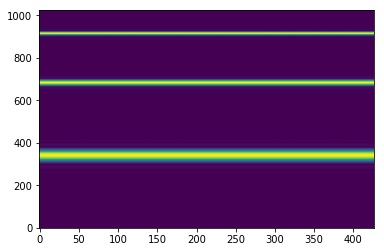

In [5]:
spec = model(torch.tensor(x))
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower')

log freq = 250.0
log freq = 250.28385634643774
log freq = 250.5680349905771
log freq = 250.85253629836316
log freq = 251.13736063615636
log freq = 251.42250837073314
log freq = 251.70797986928645
log freq = 251.99377549942614
log freq = 252.2798956291794
log freq = 252.5663406269914
log freq = 252.8531108617255
log freq = 253.14020670266402
log freq = 253.42762851950852
log freq = 253.7153766823802
log freq = 254.00345156182073
log freq = 254.2918535287924
log freq = 254.58058295467868
log freq = 254.86964021128463
log freq = 255.15902567083782
log freq = 255.44873970598798
log freq = 255.7387826898082
log freq = 256.02915499579524
log freq = 256.31985699786986
log freq = 256.6108890703773
log freq = 256.9022515880879
log freq = 257.1939449261976
log freq = 257.4859694603283
log freq = 257.7783255665282
log freq = 258.07101362127287
log freq = 258.364034001465
log freq = 258.65738708443524
log freq = 258.9510732479429
log freq = 259.2450928701761
log freq = 259.5394463297523
log freq =

log freq = 408.171092104396
log freq = 408.63453992410103
log freq = 409.09851395422555
log freq = 409.5630147922422
log freq = 410.028043036302
log freq = 410.4935992852352
log freq = 410.95968413855195
log freq = 411.42629819644304
log freq = 411.89344205978085
log freq = 412.36111633011984
log freq = 412.8293216096977
log freq = 413.2980585014358
log freq = 413.76732760893975
log freq = 414.2371295365014
log freq = 414.7074648890977
log freq = 415.17833427239316
log freq = 415.6497382927399
log freq = 416.1216775571782
log freq = 416.594152673438
log freq = 417.0671642499388
log freq = 417.54071289579133
log freq = 418.0147992207978
log freq = 418.4894238354526
log freq = 418.96458735094376
log freq = 419.44029037915266
log freq = 419.91653353265593
log freq = 420.39331742472547
log freq = 420.8706426693296
log freq = 421.3485098811337
log freq = 421.82691967550096
log freq = 422.3058726684937
log freq = 422.7853694768732
log freq = 423.2654107181014
log freq = 423.745997010341
log 

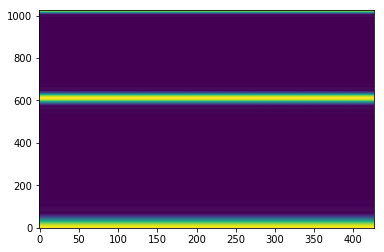

In [9]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='log', low=250, high=800)
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower')

linear freq = 0.0
linear freq = 0.07249156573198386
linear freq = 0.1449831314639677
linear freq = 0.21747469719595158
linear freq = 0.2899662629279354
linear freq = 0.36245782865991927
linear freq = 0.43494939439190317
linear freq = 0.507440960123887
linear freq = 0.5799325258558709
linear freq = 0.6524240915878546
linear freq = 0.7249156573198385
linear freq = 0.7974072230518224
linear freq = 0.8698987887838063
linear freq = 0.9423903545157901
linear freq = 1.014881920247774
linear freq = 1.0873734859797577
linear freq = 1.1598650517117417
linear freq = 1.2323566174437255
linear freq = 1.3048481831757093
linear freq = 1.3773397489076933
linear freq = 1.449831314639677
linear freq = 1.5223228803716609
linear freq = 1.5948144461036449
linear freq = 1.6673060118356287
linear freq = 1.7397975775676127
linear freq = 1.8122891432995962
linear freq = 1.8847807090315802
linear freq = 1.957272274763564
linear freq = 2.029763840495548
linear freq = 2.102255406227532
linear freq = 2.17474697195

linear freq = 45.66968641114983
linear freq = 45.74217797688181
linear freq = 45.8146695426138
linear freq = 45.88716110834578
linear freq = 45.959652674077766
linear freq = 46.032144239809746
linear freq = 46.10463580554173
linear freq = 46.17712737127372
linear freq = 46.2496189370057
linear freq = 46.32211050273769
linear freq = 46.394602068469666
linear freq = 46.467093634201646
linear freq = 46.53958519993363
linear freq = 46.61207676566561
linear freq = 46.6845683313976
linear freq = 46.75705989712959
linear freq = 46.829551462861566
linear freq = 46.90204302859355
linear freq = 46.97453459432553
linear freq = 47.04702616005752
linear freq = 47.1195177257895
linear freq = 47.19200929152149
linear freq = 47.26450085725347
linear freq = 47.33699242298545
linear freq = 47.40948398871744
linear freq = 47.48197555444942
linear freq = 47.55446712018141
linear freq = 47.626958685913394
linear freq = 47.699450251645374
linear freq = 47.77194181737736
linear freq = 47.84443338310934
linea

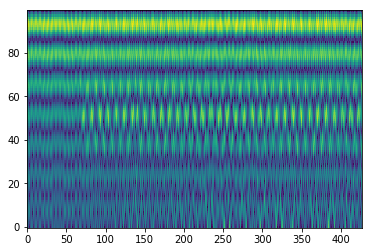

In [4]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='linear', low=250, high=800)
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0][:bin_max].numpy(), aspect='auto', origin='lower')

# Librosa

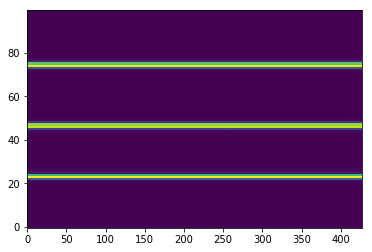

In [6]:
S_stft = np.abs(stft(x, hop_length=512, n_fft=2048,center=False, window='hann'))
plt.imshow(S_stft[:bin_max], aspect='auto', origin='lower')

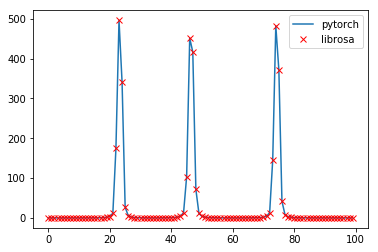

In [6]:
plt.plot(spec[0][:,0][:bin_max].numpy())
plt.plot(S_stft[:,0][:bin_max], 'rx')
plt.legend(['pytorch', 'librosa'])

In [7]:
np.allclose(S_stft, spec[0].numpy(),atol=1e-4)

True